In [3]:
import pandas as pd
import matplotlib.pyplot as plt

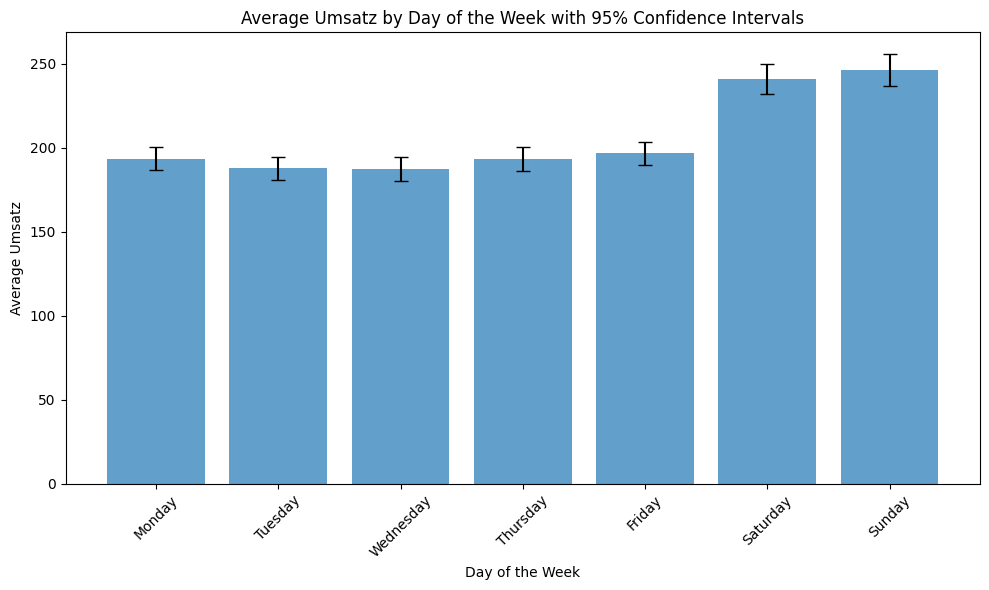

In [4]:
# Define file path again and re-run the data loading and plotting code
file_path = '/workspaces/einfuehrung-in-data-science-und-ml/umsatzdaten_gekuerzt.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Convert 'Datum' to datetime format and extract the day of the week
data['Datum'] = pd.to_datetime(data['Datum'])
data['Weekday'] = data['Datum'].dt.day_name()

# Calculate the average Umsatz by day of the week with confidence intervals
# We assume a 95% confidence interval, calculated as mean ± 1.96*standard error
summary = data.groupby('Weekday').agg(
    average_umsatz=('Umsatz', 'mean'),
    se_umsatz=('Umsatz', lambda x: x.std() / (len(x)**0.5))
)
summary['ci_upper'] = summary['average_umsatz'] + 1.96 * summary['se_umsatz']
summary['ci_lower'] = summary['average_umsatz'] - 1.96 * summary['se_umsatz']

# Reorder by weekday for proper plotting order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
summary = summary.reindex(weekday_order)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(summary.index, summary['average_umsatz'], yerr=(summary['ci_upper'] - summary['average_umsatz']),
        capsize=5, alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Average Umsatz')
plt.title('Average Umsatz by Day of the Week with 95% Confidence Intervals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Define file path again and re-run the data loading and plotting code
x = '/workspaces/einfuehrung-in-data-science-und-ml/umsatzdaten_gekuerzt.csv'
y = '/workspaces/einfuehrung-in-data-science-und-ml/wetter.csv'
z = '/workspaces/einfuehrung-in-data-science-und-ml/kiwo.csv'

# Load the dataset
umsatz = pd.read_csv(x)
wetter = pd.read_csv(y)
kiwo = pd.read_csv(z)


print(kiwo.head())

print(wetter.head())

print(kiwo.head())

        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1


In [8]:
type(summary)
print(summary)

           average_umsatz  se_umsatz    ci_upper    ci_lower
Weekday                                                     
Monday         193.688449   3.503428  200.555168  186.821729
Tuesday        187.944440   3.450620  194.707655  181.181226
Wednesday      187.477523   3.524152  194.384862  180.570185
Thursday       193.232274   3.603339  200.294820  186.169729
Friday         196.796023   3.520063  203.695347  189.896700
Saturday       241.319882   4.568145  250.273447  232.366318
Sunday         246.495651   4.873623  256.047952  236.943350
